In [1]:
from flask import Flask, jsonify, request
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_fake["class"] = 0
data_true["class"] = 1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range (23480, 23470,-1):
    data_fake.drop([i], axis=0, inplace=True)


data_true_manual_testing = data_true.tail(10)
for i in range (21416, 21406, -1):
    data_true.drop([i], axis=0, inplace=True)


In [8]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing["class"] = 0
data_true_manual_testing["class"] = 1

C:\Users\AADISH\AppData\Local\Temp\ipykernel_18864\4042680642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"] = 0
C:\Users\AADISH\AppData\Local\Temp\ipykernel_18864\4042680642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"] = 1


In [10]:
data_merge = pd.concat([data_fake, data_true], axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [11]:
data = data_merge.drop(["title", "subject", "date"], axis=1)

In [12]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
data = data.sample(frac=1)

In [14]:
data.head()

,text,class
10411,WASHINGTON (Reuters) - The Senate Banking Comm...,1
5486,WASHINGTON (Reuters) - A top aide to U.S. Pres...,1
20906,"VLADIVOSTOK, Russia (Reuters) - Russian Presid...",1
2794,Try not to laugh too hard at this one.Apparent...,0
16099,OSLO (Reuters) - The body of a man who died wh...,1


In [15]:
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [16]:
data.head()

,text,class
0,WASHINGTON (Reuters) - The Senate Banking Comm...,1
1,WASHINGTON (Reuters) - A top aide to U.S. Pres...,1
2,"VLADIVOSTOK, Russia (Reuters) - Russian Presid...",1
3,Try not to laugh too hard at this one.Apparent...,0
4,OSLO (Reuters) - The body of a man who died wh...,1


In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\\[.*?\\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\\S+|www\\.\\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\\w*\\d\\w*', '', text)
    return text

In [18]:
data['text'] = data['text'].apply(wordopt)

In [19]:
x = data["text"]
y = data["class"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [23]:
pred_lr = LR.predict(xv_test)

In [24]:
LR.score(xv_test, y_test)

0.986541889483066

In [25]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5854
           1       0.99      0.99      0.99      5366

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [27]:
pred_dt = DT.predict(xv_test)

In [28]:
DT.score(xv_test, y_test)

0.9961675579322639

In [29]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5854
           1       1.00      1.00      1.00      5366

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [31]:
pred_gb = GB.predict(xv_test)

In [32]:
GB.score(xv_test, y_test)

0.995632798573975

In [33]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5854
           1       0.99      1.00      1.00      5366

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [34]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
pred_rf = RF.predict(xv_test)

In [36]:
RF.score(xv_test, y_test)

0.9892156862745098

In [37]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5854
           1       0.99      0.99      0.99      5366

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [38]:
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_label(pred_LR[0]), output_label(pred_DT[0]), output_label(pred_GB[0]), output_label(pred_RF[0])))

In [39]:
news = str(input())
manual_testing(news)



LR Prediction: Real News 
DT Prediction: Real News 
GB Prediction: Real News 
RF Prediction: Real News


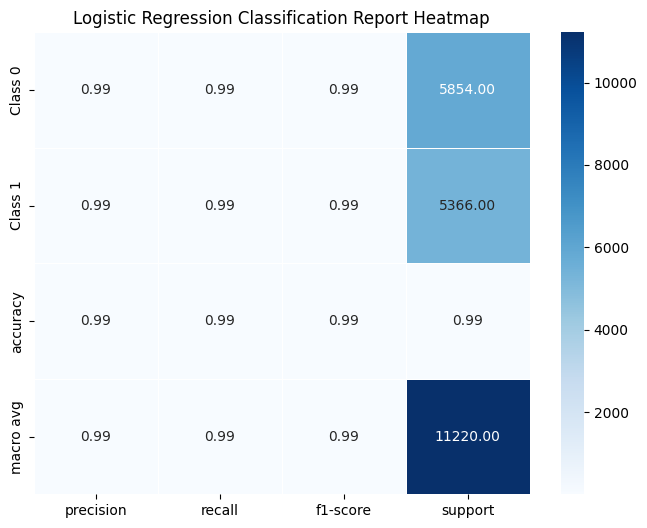

In [40]:
report_lr = classification_report(y_test, pred_lr, target_names=['Class 0', 'Class 1'], output_dict=True)

df = pd.DataFrame(report_lr).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap="Blues", fmt=".2f", linewidths=.5)
plt.title('Logistic Regression Classification Report Heatmap')
plt.show()

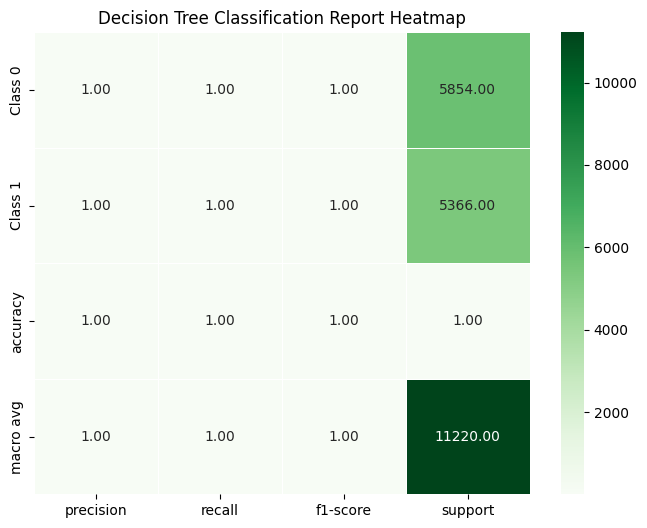

In [41]:
report_dt = classification_report(y_test, pred_dt, target_names=['Class 0', 'Class 1'], output_dict=True)

df = pd.DataFrame(report_dt).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap="Greens", fmt=".2f", linewidths=.5)
plt.title('Decision Tree Classification Report Heatmap')
plt.show()

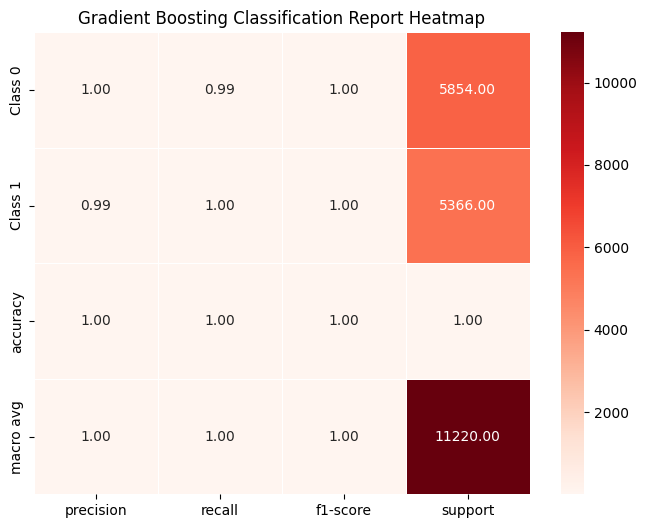

In [42]:
report_gb = classification_report(y_test, pred_gb, target_names=['Class 0', 'Class 1'], output_dict=True)

df = pd.DataFrame(report_gb).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap="Reds", fmt=".2f", linewidths=.5)
plt.title('Gradient Boosting Classification Report Heatmap')
plt.show()

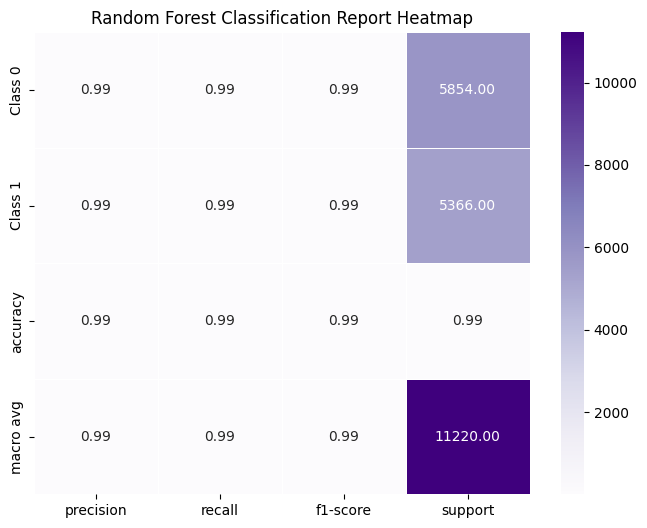

In [43]:
report_rf = classification_report(y_test, pred_rf, target_names=['Class 0', 'Class 1'], output_dict=True)

df = pd.DataFrame(report_rf).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f", linewidths=.5)
plt.title('Random Forest Classification Report Heatmap')
plt.show()